# Ballistic Deposition with Relaxation

Surface growth model including particle relaxation mechanisms. Studies how local relaxation processes smooth surfaces and affect long-term growth behavior.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [3]:
#a function to find the smallest value amoung 3 numbers
def smallest(a, b, c):
    if a >= b:
        if c >= b:
            return b
        else:
            return c
    else:
        if c < a:
            return c
        elif c == a:
            rand = [a, c]
            return random.choice(rand)
        else:
            return a


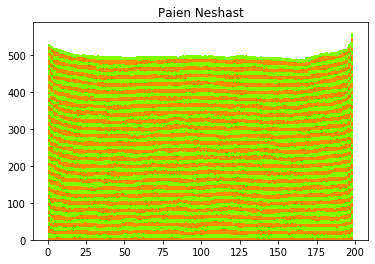

In [23]:
# Paeinneshast for x particles in an array of size L computing w also
x = 100000
L = 200
line     = np.zeros(L) 
myBottom = np.zeros(L-2) 
T     = np.arange(x)
h_av  = np.zeros(x)
h2_av = np.zeros(x)
w     = np.zeros(x)

color = np.array(['darkorange', 'chartreuse'])

#boundary condition
line[0]   = x
line[L-1] = x

for t in T:
    c = int(t/(10 * L))%2

    i = int(random.random() * L)
    
    s = smallest(line[(L+i-1)%L], line[i], line[(i+1)%L])
    if line[i] == s:
        line[i] += 1
    elif line[(i+1)%L] == s:
        line[(i+1)%L] += 1
    else:
        line[(L+i-1)%L] += 1
        
        
    h_av[t]  = np.mean(line[1:(L-1)])
    h2_av[t] = np.mean(line[1:(L-1)] ** 2)
    w[t]     = np.sqrt(h2_av[t]-h_av[t] ** 2)
    
    if t%1000 == 0:
        p = np.arange(L)
        plt.bar(p[1:(L-1)], line[1:(L-1)]-myBottom, bottom = myBottom, width = 1, color = color[c])
        myBottom = np.copy(line[1:(L-1)])

plt.title("Paien Neshast")
plt.savefig('PaienNesh.png')
plt.show()  

In [43]:
%%time

#same, looking for a faster algorithm

x = 10000
L = 200
line     = np.zeros(L) 
myBottom = np.zeros(L-2) 
T     = np.arange(x)

m = int(np.floor(np.log2(x)+1))
w     = np.zeros(m)

color = np.array(['darkorange', 'chartreuse'])

#boundary condition
line[0]   = x
line[L-1] = x

for t in T:
    c = int(t/(10 * L))%2

    i = int(random.random() * L)
    
    s = smallest(line[(L+i-1)%L], line[i], line[(i+1)%L])
    if line[i] == s:
        line[i] += 1
    elif line[(i+1)%L] == s:
        line[(i+1)%L] += 1
    else:
        line[(L+i-1)%L] += 1
    
    if np.log2(t)%1 == 0:
        w[int(np.log2(t))] = np.std(line[1:(L-1)]) 

print(w)

[0.0999949  0.12215542 0.15689116 0.2082989  0.28015512 0.372678
 0.50081558 0.59013158 0.76349539 0.8098623  1.07029008 1.21221591
 1.69998079 2.3426124 ]
Wall time: 151 ms


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


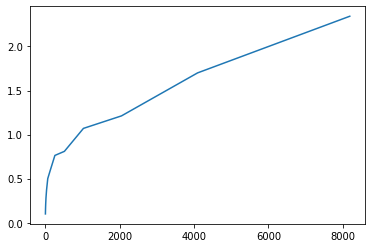

In [45]:
#here is how we should plot w versus t

plt.plot(2 ** np.arange(m), w)

In [4]:
def PaeinNesh(x, L):
    line     = np.zeros(L) 
    myBottom = np.zeros(L-2) 
    T     = np.arange(x)

    m = int(np.floor(np.log2(x)+1))
    w     = np.zeros(m)

    color = np.array(['darkorange', 'chartreuse'])

    #boundary condition
    line[0]   = x
    line[L-1] = x

    for t in T:
        c = int(t/(10 * L))%2

        i = int(random.random() * L)

        s = smallest(line[(L+i-1)%L], line[i], line[(i+1)%L])
        if line[i] == s:
            line[i] += 1
        elif line[(i+1)%L] == s:
            line[(i+1)%L] += 1
        else:
            line[(L+i-1)%L] += 1

        if np.log2(t)%1 == 0:
            w[int(np.log2(t))] = np.std(line[1:(L-1)]) 
    return w


In [49]:
N = 20
x = 10000000
L = 200
m = int(np.floor(np.log2(x)))+1
ws = np.zeros((N, m))
for n in range(N):
    ws[n] = PaeinNesh(x, L)


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [50]:
w_av = np.zeros(m)
for t in range(m):
    w_av[t] = np.mean(ws[:, t]) 

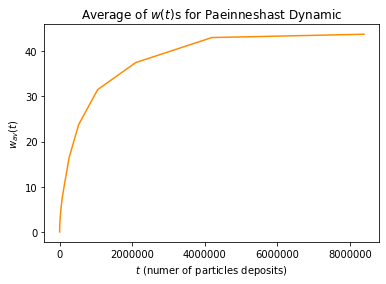

In [54]:
plt.plot(2 ** np.arange(m), w_av, c = 'darkorange')
plt.title("Average of $w(t)$s for Paeinneshast Dynamic")
plt.ylabel("$w_{av}(t)$")
plt.xlabel("$t$ (numer of particles deposits)")
plt.savefig('wavp.png')

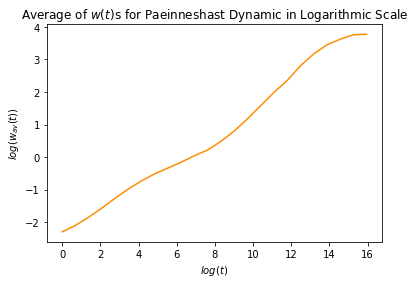

In [55]:
plt.plot(np.log(2 ** np.arange(m)), np.log(w_av))
plt.title("Average of $w(t)$s for Paeinneshast Dynamic in Logarithmic Scale")
plt.ylabel("$log(w_{av}(t))$")
plt.xlabel("$log(t)$")
plt.savefig('logwavp.png')

In [69]:
np.shape(w_av)
print(w_av[0:24])

[ 0.0999949   0.12215542  0.15689116  0.2082989   0.28102922  0.37467511
  0.48013235  0.59775351  0.71422397  0.85434714  1.04220687  1.24223978
  1.62044167  2.21801212  3.23729242  4.85641604  7.27704553 10.50443266
 16.49453419 23.74239529 31.43864356 37.3908885  42.89919989 43.62938619]


In [77]:
#finding beta

beta = np.polyfit(np.log10(2 ** np.arange(m)[0:21]), np.log10(w_av[0:21]),1)
print("\u03B2 =", np.round(beta[0], 4))
print(beta)

β = 0.4038
[ 0.40383171 -1.08685245]


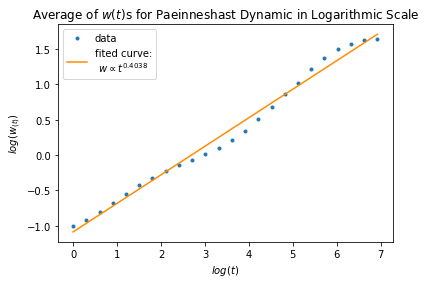

In [87]:
plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.', label = 'data')
plt.title("Average of $w(t)$s for Paeinneshast Dynamic in Logarithmic Scale")
plt.ylabel("$log(w_{(t)})$")
plt.xlabel("$log(t)$")
plt.plot(np.log10(2 ** np.arange(m)), beta[0] * np.log10(2 ** np.arange(m)) + beta[1], c = 'darkorange', label = 'fited curve:\n $w \propto t^{0.4038}$')
plt.legend()
plt.savefig('betap.png')

try to do the same for $10^8$ particle to watch better!

In [88]:
%%time
N = 1
x = 100000000
L = 200
m = int(np.floor(np.log2(x)))+1
ws = np.zeros((N, m))
for n in range(N):
    ws[n] = PaeinNesh(x, L)


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


Wall time: 21min 22s


β = 0.4073


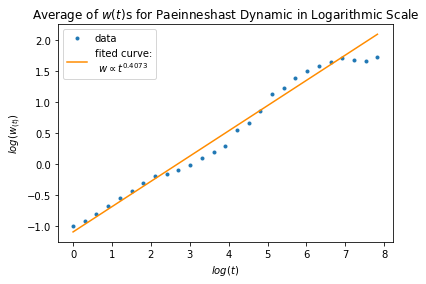

In [91]:
w_av = np.zeros(m)
for t in range(m):
    w_av[t] = np.mean(ws[:, t]) 
    
#finding beta

beta = np.polyfit(np.log10(2 ** np.arange(m)[0:21]), np.log10(w_av[0:21]),1)
print("\u03B2 =", np.round(beta[0], 4))

plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.', label = 'data')
plt.title("Average of $w(t)$s for Paeinneshast Dynamic in Logarithmic Scale")
plt.ylabel("$log(w_{(t)})$")
plt.xlabel("$log(t)$")
plt.plot(np.log10(2 ** np.arange(m)), beta[0] * np.log10(2 ** np.arange(m)) + beta[1], c = 'darkorange', label = 'fited curve:\n $w \propto t^{0.4073}$')
plt.legend()
plt.savefig('betap8.png')

#### Finding z
$t_s \propto L^z$ 

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


[0.45585521 0.50530768 0.61457922 0.74659625 0.94636917 0.97799842
 1.47723176 1.4857093  1.8965758  1.64774743 1.46252521 1.90548603
 2.27175959 2.53903845 2.15043912 1.90323869 2.4362502  1.88013351
 2.0091028 ]


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


[0.31426968 0.372678   0.44790321 0.54037009 0.70989761 0.76514554
 1.04716466 1.48282809 1.93262132 2.50521954 3.0781697  3.17942274
 3.71172536 3.93269647 3.93501789 3.96099387 4.29936769 3.32979378
 4.61580615]


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


[0.22329688 0.2696566  0.34508228 0.4309395  0.52702067 0.61958493
 0.77241246 0.94557706 1.40140403 1.80566219 2.52637634 3.45610067
 4.60451743 6.19767793 6.68615477 6.30937535 8.35302859 7.84043468
 8.36839772]


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


[ 0.18246561  0.22146953  0.28066932  0.36206897  0.4624696   0.55367262
  0.68314109  0.88365891  1.07149465  1.53214516  1.98725853  2.64753109
  3.97132006  5.64228316  7.91011125  9.87138866 11.0398829  13.37892628
 12.78997793]


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log2
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


[ 0.1580619   0.19230769  0.24493555  0.3232738   0.42764505  0.54158864
  0.66309873  0.78546212  0.96190494  1.19913132  1.40437642  1.93951463
  3.08598591  4.467556    6.50777916  9.10191314 12.10953616 16.74046915
 18.57289063]
Wall time: 6min 20s


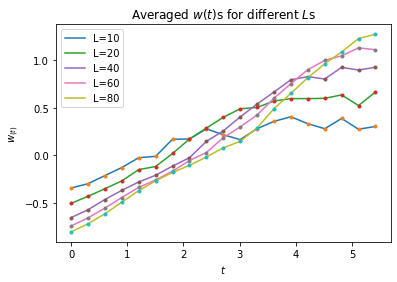

In [8]:
%%time
N = 10
x = 100000 * 5

L_mat = [10, 20, 40, 60, 80]
for L in L_mat:
    m = int(np.floor(np.log2(x)))+1
    ws = np.zeros((N, m))
    for n in range(N):
        ws[n] = PaeinNesh(x, L)

    w_av = np.zeros(m)
    for t in range(m):
        w_av[t] = np.mean(ws[:, t]) 

    plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), label = 'L={}'.format(L))
    plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.')
    print(w_av)
plt.title("Averaged $w(t)$s for different $L$s")
plt.ylabel("$w_{(t)}$")
plt.xlabel("$t$")
plt.legend()
plt.savefig("save.png")

z = 3.1787
[ 3.17869804 -0.96847581]


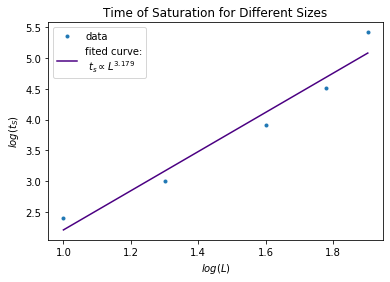

In [15]:
x = [2**8, 2**10, 2**13, 2**15, 2**18]
plt.plot(np.log10(L_mat), np.log10(x), '.', label = 'data')

z = np.polyfit(np.log10(L_mat), np.log10(x),1)

plt.plot(np.log10(L_mat), z[0]*np.log10(L_mat)+z[1], '-', c = 'indigo', label = 'fited curve:\n $t_s \propto L^{3.179} $')
plt.legend()
plt.title("Time of Saturation for Different Sizes")
plt.ylabel("$log(t_S)$")
plt.xlabel("$log(L)$")
print("z =", np.round(z[0], 4))
print(z)
plt.savefig("z.png")

In [18]:
alpha = 0.4073 *z[0]
alpha

1.294683710811989